# Imports

In [11]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data

In [3]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
# Check out the data
diabetes_data = np.c_[diabetes.data, diabetes.target]
diabetes_columns = diabetes.feature_names + ['target']

diabetes_df = pd.DataFrame(data=diabetes_data, columns=diabetes_columns)

diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

# Multi Linear Regression Model

In [29]:
def get_set_with_bias(dataset):
    n = dataset.shape[0]
    
    # Add bias term to the features
    #   (n, i) -> (n, i + 1)
    #   Need this to account for the intercept term (theta_0) in the linear regression model
    dataset_bias = np.c_[np.ones((n, 1)), dataset]
    
    return dataset_bias

In [47]:
def cost_function(X, y, alpha=0.01, iters=1000):
  """
  Gradient descent for multiple linear regression.

  Input:
    X:     np array of shape (n_samples, n_features) - training data
    y:     np array of shape (n_samples,) - target values
    alpha: Learning rate
    iters: Number of iterations

  Output:
    thetas: np array of shape (n_features + 1,) - learned parameters
    mse_history: List of cost values (MSE) at each iteration
  """
  # Get the number of sampes
  n = X.shape[0]

  # Get the number of features including
  i = X.shape[1]

  # Add bias term to the features
  #   (n, i) -> (n, i + 1)
  #   Need this to account for the intercept term (theta_0) in the linear regression model
  X_bias = get_set_with_bias(X)
  
  # Initiate theta with zeros
  thetas = np.zeros(i + 1)
  
  # Track the cost history for plotting
  mse_history = []

  for _ in range(iters):
    # ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ
    preds = X_bias.dot(thetas)
    
    # ŷ - y
    error = preds - y

    # (11, 353) -> (353, 11)
    X_bias_transposed = X_bias.T

    # (1/n) × Σ(ŷ⁽ⁱ⁾ - y⁽ⁱ⁾)xⱼ⁽ⁱ⁾
    gradients = (1 / n) * X_bias_transposed.dot(error)

    # θⱼ = θⱼ - α × (1/n) × Σ(ŷ⁽ⁱ⁾ - y⁽ⁱ⁾)xⱼ⁽ⁱ⁾
    thetas = thetas - alpha * gradients
    
    # (1/2n) × Σ(ŷ - y)²
    mse = (1 / (2 * n)) * np.sum(error ** 2)
    mse_history.append(mse)

  return thetas, mse_history

# Feature scaling

In [43]:
# Scale the features
scaler = StandardScaler()

# Calculate the mean and standard deviation of the training data and scale it
#   mean = sum(X_train) / len(X_train)
#   std = sqrt(sum((X_train - mean) ** 2) / len(X_train))
#   X_train = (X_train - mean) / std
X_train = scaler.fit_transform(X_train)

# Scale the test data using previously calculated mean and std
#   X_test = (X_test - mean) / std
X_test = scaler.transform(X_test)

pd_scaled_train = pd.DataFrame(X_train, columns=diabetes.feature_names)
pd_scaled_test = pd.DataFrame(X_test, columns=diabetes.feature_names)

print("First 5 rows of the scaled training data:")
print(pd_scaled_train.head())

print("First 5 rows of the scaled test data:")
print(pd_scaled_test.head())

First 5 rows of the scaled training data:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.243962  1.025829  0.063645  1.210733  0.590736  0.383248  0.879258   
1 -2.231571 -0.974821 -1.567897 -0.545554 -1.891763 -2.024327  0.567203   
2  0.544026  1.025829 -0.708030  0.698483 -0.227028  0.050710 -0.212936   
3 -0.131119  1.025829  0.041597 -1.789590 -0.227028 -0.335034  1.035286   
4  1.369204  1.025829  0.438459 -0.106482  0.444707  0.576120 -0.056908   

         s4        s5        s6  
0 -0.830724  0.075103  1.492971  
1 -1.598664 -0.869720 -0.102020  
2 -0.062784 -0.306027 -1.025437  
3 -0.830724 -0.841247 -1.780959  
4 -0.062784  0.175782  0.065873  
First 5 rows of the scaled test data:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.393994  1.025829  2.158193  1.503448 -0.752734 -0.547859 -0.524991   
1 -0.281151 -0.974821  1.254230  1.137554  1.028824  0.642627 -0.368964   
2  0.769075  1.025829  0.195932  0.91801

# Training

In [66]:
# Train the model using gradient descent
thetas, cost_history = cost_function(X_train, y_train, alpha=0.001, iters=10000)

# Print the table of all thetas with their feature names
theta_table = pd.DataFrame({'Feature': ['Bias'] + diabetes.feature_names, 'Theta': thetas})
print(theta_table)

   Feature       Theta
0     Bias  151.599384
1      age   -1.504492
2      sex  -11.485990
3      bmi   28.034522
4       bp   14.153544
5       s1   -4.633953
6       s2   -6.184710
7       s3  -10.450330
8       s4    5.275077
9       s5   25.001240
10      s6    2.307993


# Evaluation

## (a) Include a plot to show that the error was converged.

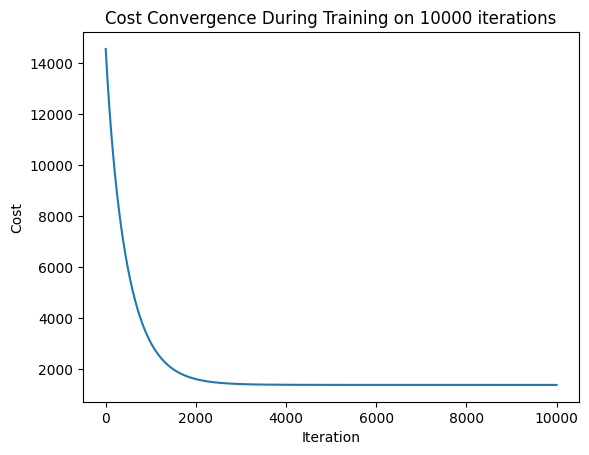

In [67]:
# Plot the cost function
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Convergence During Training on 10000 iterations')
plt.show()

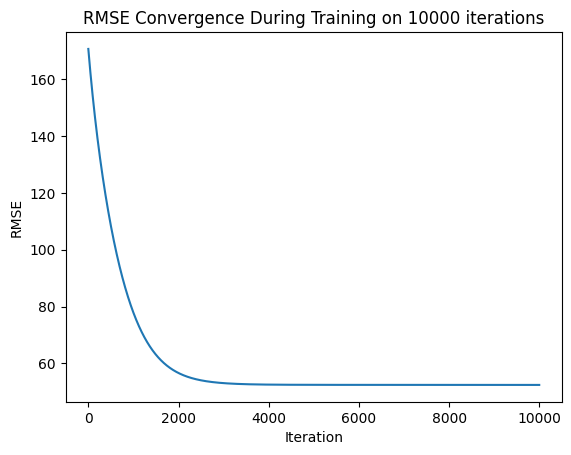

In [68]:
# Plot the RMSE error during training
# cost_history contains (1/2n) × Σ(ŷ - y)², so multiply by 2 to get MSE, then sqrt for RMSE
rmse_history = np.sqrt(np.array(cost_history) * 2)
plt.plot(rmse_history)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE Convergence During Training on 10000 iterations')
plt.show()

According to the graph the error is converging

## (b) Report your RMSE (Root mean Squared Error). [Use 20 % of data as testing set.]

In [69]:
# Report RMSE using the testing set
X_test_bias = get_set_with_bias(X_test)
y_pred = X_test_bias.dot(thetas)
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f"RMSE on the testing set: {rmse}")

RMSE on the testing set: 58.86020024267908


RMSE on training dataset is 58.8602

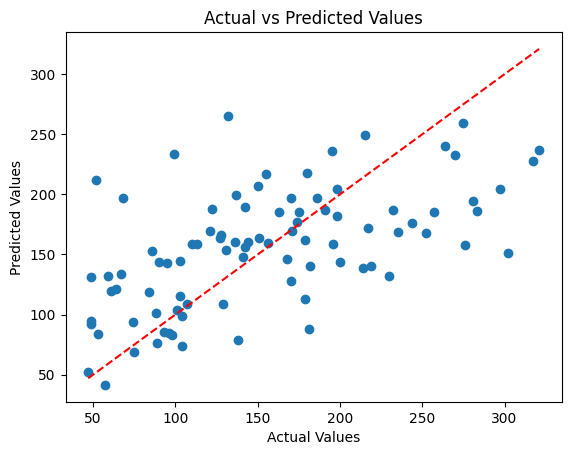

In [70]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## (c) What is your suggestion if we get the following RMSE plot during training? [Answer based on your implementation not a generic solution]

The plot shows RMSE plot during training that diverges.

It stays at near 0 until around 9000 iterations and then expodes.

If alpha is too hight then at one point the parameters can jump to high values.

To fix it I would suggest decreasing the learning rate of the model like so:

`thetas, cost_history = cost_function(X_train, y_train, alpha=0.0001, iters=10000)`